In [1]:
import numpy as np
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies = pd.read_csv('./data/peliculas.csv', encoding = 'utf-8')
movies.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [3]:
movies.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [4]:
movies.index

RangeIndex(start=0, stop=5043, step=1)

In [5]:
columna1 = movies['movie_title']
columna1.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [6]:
linea = movies.loc[10, :]
linea

movie_title                                Batman v Superman: Dawn of Justice 
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
duration.1                                                                 183
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                        

In [7]:
movies.loc[:,'movie_title'].head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

<div class="alert alert-success"  >
<h2>Inspecionamos los datos.</h2>
</div>

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
movie_title                  5043 non-null object
title_year                   4935 non-null float64
color                        5024 non-null object
aspect_ratio                 4714 non-null float64
duration                     5028 non-null float64
language                     5031 non-null object
country                      5038 non-null object
duration.1                   5028 non-null float64
genres                       5043 non-null object
content_rating               4740 non-null object
plot_keywords                4890 non-null object
director_name                4939 non-null object
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
cast_total_facebook_likes    5043 non-null int64
budget                       4551 non-null float64
imdb_score                   5043 non-n


### Columnas de texto y columnas numericas 


In [9]:
(movies.dtypes == float) | (movies.dtypes == int)

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [10]:
num = (movies.dtypes == float) | (movies.dtypes == int)
num_cols = [i for i in num.index if num[i] == True]  # columnas numericas
str_cols = [i for i in num.index if num[i] == False] # columnas string
display(num_cols)
display(str_cols)

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

<div class="alert alert-success"  >
<h2>Salud de los datos</h2>
</div>

In [11]:
movies_num = movies[num_cols]


### Informacion estadistica del dataframe

In [12]:
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


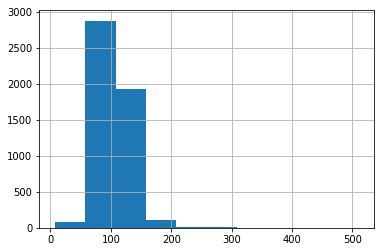

In [13]:
movies_num['duration'].hist()

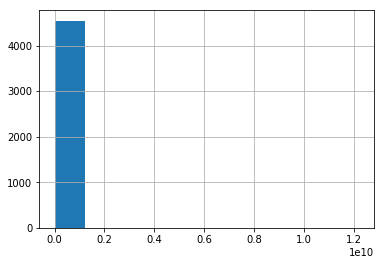

In [14]:
movies_num['budget'].hist()

Situación anomala. Para debuggear esto usamos una tecnica de pandas llamada **boolean filtering**. Se construye una serie de booleanos con el mismo indice que nuestro dataFrame.

In [15]:
(movies_num['budget'] > 1e9).value_counts()

False    5037
True        6
Name: budget, dtype: int64

Como vemos hay 6 datos anomalos.

In [16]:
mask = (movies_num['budget'] > 1e9)
movies[mask]  # solo las lineas anomalas.  Las que estan en True


,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


<div class="alert alert-success"  >
<h3>Usemos un dataFrame con menos anomalias</h3>
</div>

In [17]:
pd.read_csv('./data/numbers.csv').head()

,Unnamed: 0,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End
3,3,Spectre,200074175,http://www.the-numbers.com/movie/Spectre#tab=s...,300000000,11/6/2015,879620923,Spectre
4,4,The Dark Knight Rises,448139099,http://www.the-numbers.com/movie/Dark-Knight-R...,275000000,7/20/2012,1084439099,The Dark Knight Rises


In [18]:
financial = pd.read_csv('./data/numbers.csv')
financial = financial[['movie_title','production_budget','worldwide_gross']]
print(financial.shape)
print(movies.shape)

(4341, 3)
(5043, 19)


Ahora vamos a añadir la columna 'moves_title' al dataFrame movie_num, para poder hacer el **merge** con el dataFrame financial.

In [36]:
movies_num2 = pd.concat([movies_num, movies['movie_title']], axis=1)
# axis=1 para que sea por columnas

In [37]:
movies_v2 = pd.merge(financial, movies_num2, on='movie_title', how='left')
# on='movie_title' es la llave con la que se hace el merge
# how='left'  indica el tamaño final del dataFrame, en este caso sera
# igual al del lado izquierdo
movies_v2.shape

(4385, 11)

<div class="alert alert-success"  >
<h2>Problema de datos faltantes</h2>
</div>

In [38]:
movies_v2.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


### Datos en cero

In [39]:
(movies_v2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [40]:
avaliable = ((movies_v2 != 0) & (movies_v2.notnull()))
# dataFrame limpio de datos nulos y datos cero

#### Verifiquemos que todas las lineas estan con todos los valores en True.

In [41]:
avaliable.all(axis=1).value_counts()

True     3408
False     977
dtype: int64

#### Vemos que 977 lineas tienen problemas :(
#### Eliminemos esas lineas problematicas.

In [42]:
mask = avaliable['worldwide_gross']
avaliable['worldwide_gross'].value_counts()

True     4104
False     281
Name: worldwide_gross, dtype: int64

#### Vemos que solo 281 datos  estan en false, asi que no es necesario eliminar los 977 datos que habiamos dicho.  Redefinimos nuestro dataFrame con los datos que son no nulos para la columna ** 'worldwide_gross' **

In [43]:
movies_v2 = movies_v2[mask]

In [44]:
((movies_v2 != 0) & (movies_v2.notnull())).worldwide_gross.value_counts()

True    4104
Name: worldwide_gross, dtype: int64

En el caso de que las caracteriticas que no son la variable objetivo tengan datos false, en lugar de quitarlos podemos reemplazarlos con datos que no afecten la calidad de las predicciones. La estrategia mas comun es usar la media de todos los datos.

In [45]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = np.nan, strategy='mean', axis=1)

In [46]:
# extraemos la columna de titulos.
movies_v2 = movies_v2.drop('movie_title', axis=1)

# extraemos columna duplicada.
movies_v2 = movies_v2.drop('duration.1', axis=1)

# verificamos que este correcto.
movies_v2.head()


,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1,NaN
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0


In [49]:
movies_v2.values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09,            nan, ...,
                   nan, 7.10000000e+00,            nan],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00,            nan],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
                   nan, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [50]:
# los valores nan seran reemplazados por la media de cada columna.
values = imputer.fit_transform(movies_v2)
display(values)

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09, 5.91165594e+08, ...,
        5.91165594e+08, 7.10000000e+00, 5.91165594e+08],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00, 1.90568571e+03],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        3.66995625e+03, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

Ahora pasamos este array a un dataFrame.

In [53]:
x = pd.DataFrame(values)

x.columns = movies_v2.columns
x.index = movies_v2.index

x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2.009000e+03,1.780000e+00,1.780000e+02,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,5.911656e+08,5.911656e+08,5.911656e+08,143.0,5.911656e+08,7.1,5.911656e+08
2,300000000.0,9.634204e+08,2.007000e+03,2.350000e+00,1.690000e+02,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2.015000e+03,2.350000e+00,1.480000e+02,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2.012000e+03,2.350000e+00,1.640000e+02,106759.0,2.500000e+08,8.5,4.481306e+08


In [54]:
avaliable = ((x != 0) & (x.notnull()))
avaliable.all(axis=1).value_counts()

True     4084
False      20
dtype: int64


<div class="alert alert-info"  >
<h3>Perfecto. Ya tenemos listo nuestro dataFrame</h3>
</div>

In [56]:
# Lo guardamos.
x.to_csv('./data/x.csv', index=False)